In [1]:
import pandas_datareader.data as web

In [35]:
NFLX = web.DataReader('NFLX','yahoo',start='2015-01-01',
                         end='2021-01-01')
NEE= web.DataReader('NEE','yahoo',start='2015-01-01',
                         end='2021-01-01')
PGR = web.DataReader('PGR','yahoo',start='2015-01-01',
                         end='2021-01-01')
TMUS = web.DataReader('TMUS','yahoo',start='2015-01-01',
                         end='2021-01-01')
AMZN = web.DataReader('AMZN','yahoo',start='2015-01-01',
                         end='2021-01-01')

In [36]:
Portfolio_list = [NFLX,NEE,PGR,TMUS,AMZN]

In [37]:
NFLX

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50.331429,48.731430,49.151428,49.848572,13475000.0,49.848572
2015-01-05,49.258572,47.147144,49.258572,47.311428,18165000.0,47.311428
2015-01-06,47.639999,45.661430,47.347141,46.501431,16037700.0,46.501431
2015-01-07,47.421429,46.271427,47.347141,46.742859,9849700.0,46.742859
2015-01-08,47.835712,46.478573,47.119999,47.779999,9601900.0,47.779999
...,...,...,...,...,...,...
2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000.0,513.969971
2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900.0,519.119995
2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400.0,530.869995


In [4]:
portfolio_dict = {'NFLX': NFLX,'NEE':NEE,'PGR': PGR,'TMUS': TMUS, 'AMZN': AMZN}

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

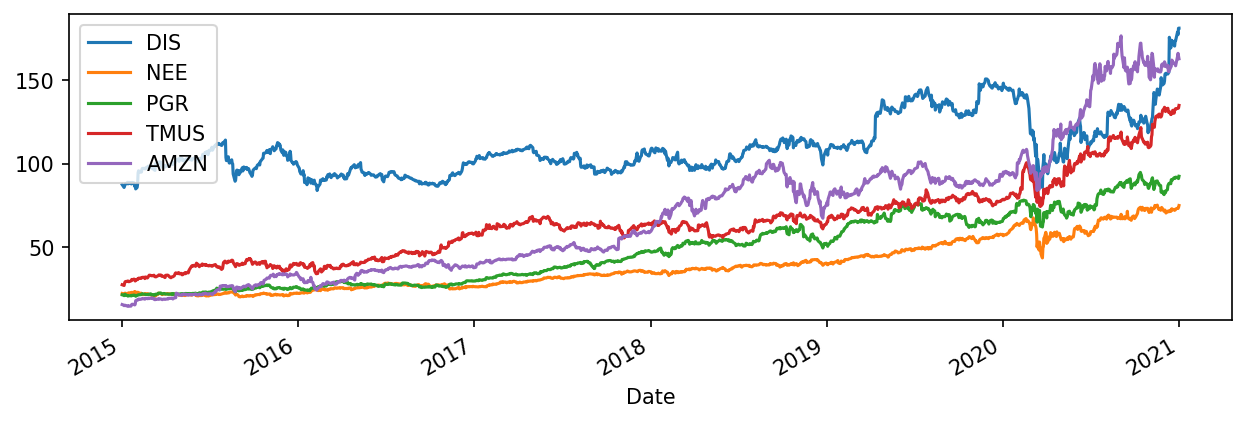

In [6]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
NFLX['Adj Close'].plot(ax=ax,label='NFLX')
NEE['Adj Close'].plot(ax=ax,label='NEE')
PGR['Adj Close'].plot(ax=ax,label='PGR')
TMUS['Adj Close'].plot(ax=ax,label='TMUS')
AMZN['Adj Close'].plot(ax=ax,label='AMZN')
plt.legend()

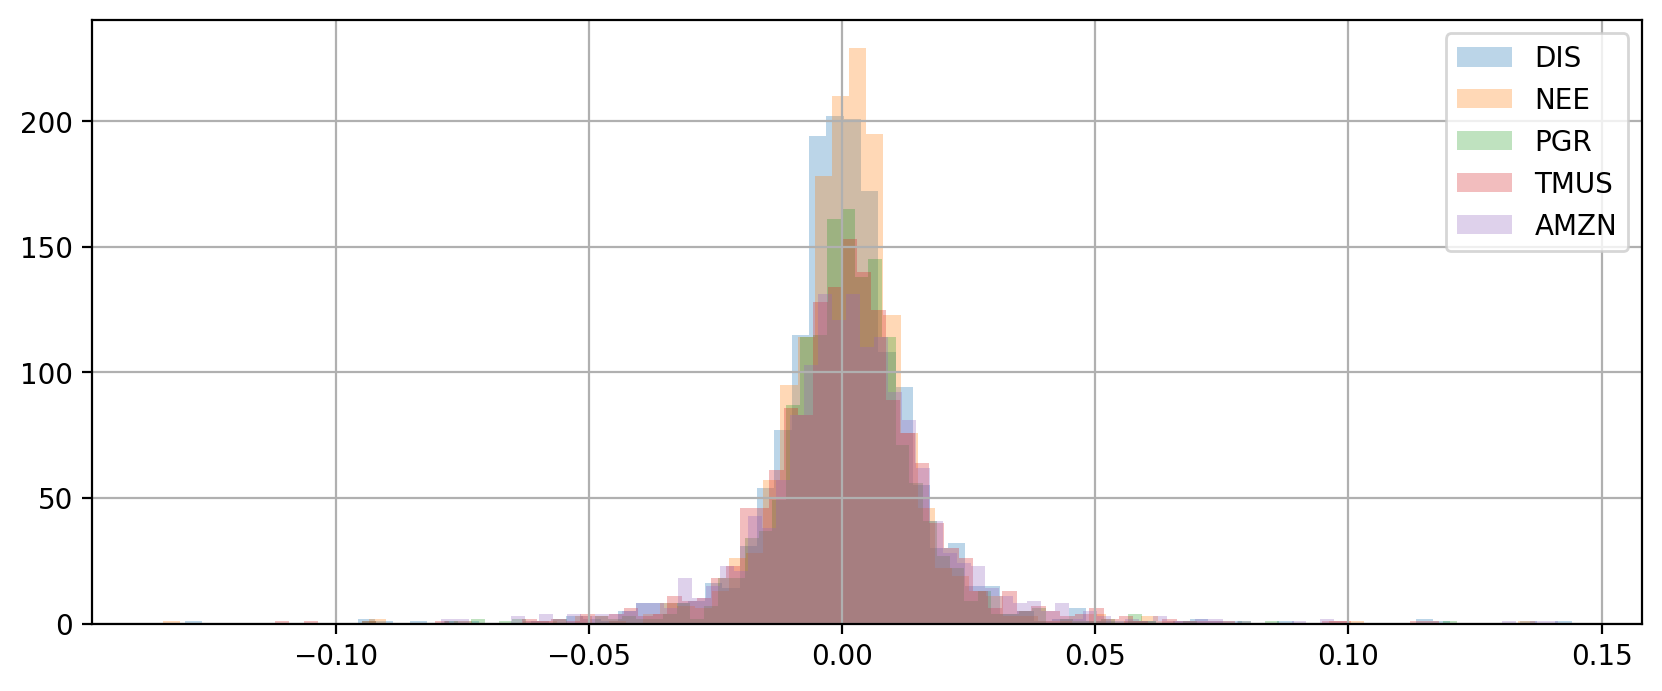

In [7]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
           stock_df['Adj Close'].pct_change(1).hist(label=stock_name,alpha=.3,bins=80)
        
plt.legend()

In [8]:
NFLX_returns = DIS['Adj Close'].pct_change(1)[1:]
NEE_returns = NEE['Adj Close'].pct_change(1)[1:]
PGR_returns = PGR['Adj Close'].pct_change(1)[1:]
TMUS_returns = TMUS['Adj Close'].pct_change(1)[1:]
AMZN_returns = AMZN['Adj Close'].pct_change(1)[1:]

In [9]:
NFLX_cum_returns = (NFLX_returns+1).cumprod()

In [10]:
NEE_cum_returns = (NEE_returns+1).cumprod()

In [11]:
PGR_cum_returns = (PGR_returns+1).cumprod()

In [12]:
TMUS_cum_returns = (TMUS_returns+1).cumprod()

In [13]:
AMZN_cum_returns = (AMZN_returns+1).cumprod()

In [14]:
NFLX = NFLXS_cum_returns*5000

In [15]:
NEE_5000 =NEE_cum_returns*5000

In [16]:
PGR_5000 =PGR_cum_returns*5000

In [17]:
TMUS_5000 = TMUS_cum_returns*5000

In [18]:
AMZN_5000 = AMZN_cum_returns*5000

In [19]:
def compute_sharpe_ratio(data,risk_free_Rate=0):
    mean_return=data['Adj Close'].pct_change(1).mean()
    std = data['Adj Close'].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_Rate)/std
    
    return (252**0.5)*sharpe_ratio

In [20]:
# here we will calculate the annualized return of each portfolio 

for ticker, df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is:{compute_sharpe_ratio(df)}")
    
    # this shows that MET had the worst Sharpe ratio and CVX had the best ratio 

DIS Annualized Sharpe Ratio is:0.5843681342659617
NEE Annualized Sharpe Ratio is:1.0189548467912755
PGR Annualized Sharpe Ratio is:1.1757987249040949
TMUS Annualized Sharpe Ratio is:1.0897621455117845
AMZN Annualized Sharpe Ratio is:1.4236088830280305


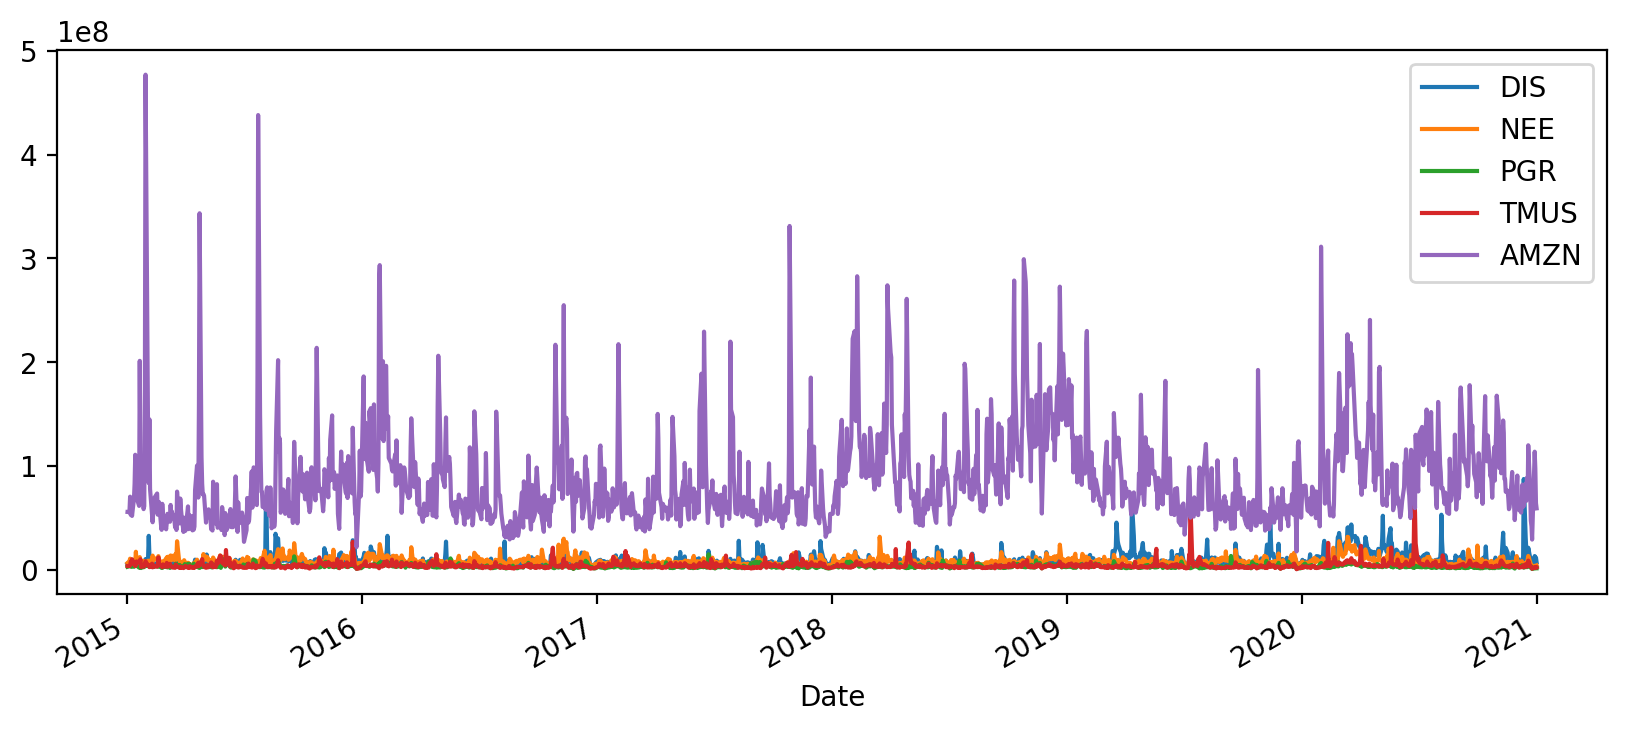

In [22]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
           stock_df['Volume'].plot(label=stock_name)
        
plt.legend()


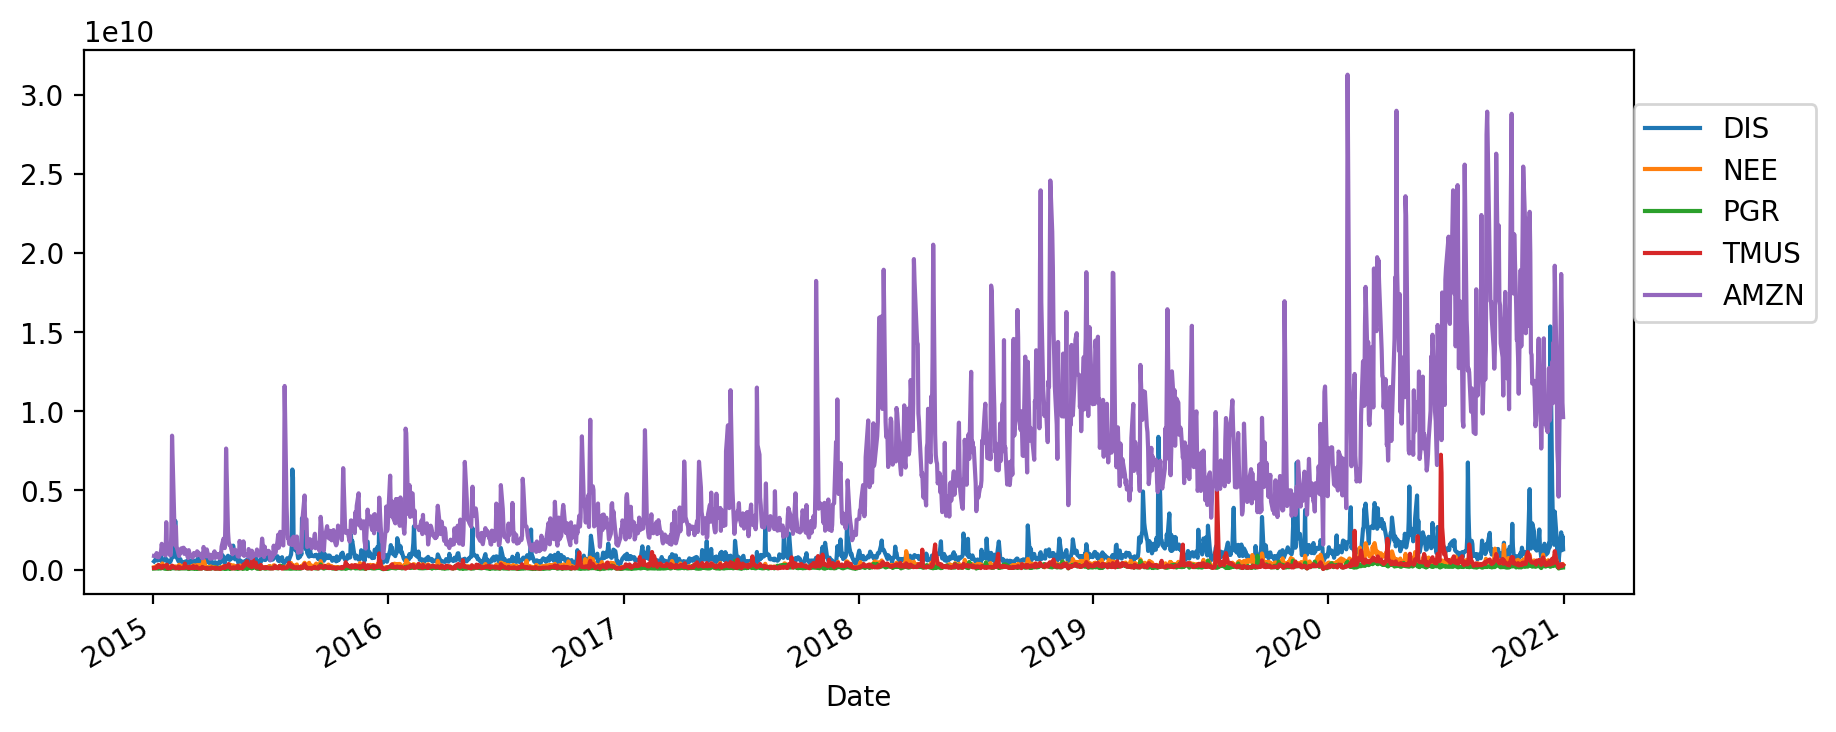

In [23]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
    
           (stock_df['Volume']*stock_df['Adj Close']).plot(label=stock_name)
        
plt.legend(loc=(1,0.5))

In [24]:
# Sortino Ratio
def compute_sortino_ratio(data,threshold=0,risk_free_Rate=0):
    mean_return=data['Adj Close'].pct_change(1).mean()
    downside = data[data['Adj Close'].pct_change(1)<threshold]['Adj Close'].pct_change(1)
    std = downside.std()
                    
    sortino_ratio= (mean_return-risk_free_Rate)/std
    
    return (252**0.5)*sortino_ratio

In [29]:
sort_NFLX = compute_sortino_ratio(NFLX)
sort_NEE = compute_sortino_ratio(NEE)
sort_PGR = compute_sortino_ratio(PGR)
sort_TMUS = compute_sortino_ratio(TMUS)
sort_AMZN = compute_sortino_ratio(AMZN)

In [30]:
import scipy.stats

In [31]:
def compute_psr(df, benchmark=0):
    
    sr = compute_sharpe_ratio(df)
    skew = scipy.stats.skew(df['Adj Close'])
    kurtosis = scipy.stats.kurtosis(df['Adj Close'], fisher=True)
    n = len(df)
                            
    sigma_sr = (( (1/n-1)) * (1+.5*sr**2 + skew*sr+(kurtosis/4)*sr**2)**.5)
    
    ratio = (sr-benchmark)/sigma_sr
                            
    psr = scipy.stats.norm.cdf(ratio)
    return psr 

In [39]:
NFLX_df = pd.DataFrame(NFLX['Adj Close'])

In [41]:
NEE_df = pd.DataFrame(NEE['Adj Close'])

In [42]:
PGR_df = pd.DataFrame(PGR['Adj Close'])

In [43]:
TMUS_df = pd.DataFrame(TMUS['Adj Close'])

In [44]:
AMZN_df = pd.DataFrame(AMZN['Adj Close'])

In [45]:
Retirement_portfolio1 = pd.concat([NFLX_df,NEE_df,PGR_df,TMUS_df,AMZN_df] ,axis=1)

In [46]:
Retirement_portfolio1.columns = ['NFLX','NEE','PGR','TMUS','AMZN']

In [47]:
Retirement_portfolio1.head()

,NFLX,NEE,PGR,TMUS,AMZN
Date,,,,,
2015-01-02,49.848572,22.077126,21.263206,27.299999,15.4260
2015-01-05,47.311428,21.843296,21.027294,26.930000,15.1095
2015-01-06,46.501431,21.928133,20.767794,26.870001,14.7645
2015-01-07,46.742859,22.128860,21.200296,28.250000,14.9210
2015-01-08,47.779999,22.263357,21.624931,29.020000,15.0230


In [48]:
Retirement_returns = Retirement_portfolio1.pct_change(1).dropna()

<AxesSubplot:xlabel='Date'>

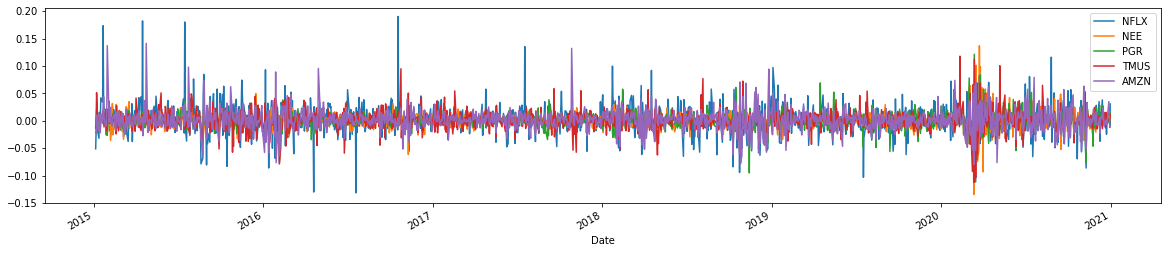

In [49]:
Retirement_returns.plot(figsize=(20,4))

In [50]:
np.dot([1,0,0,0,0],Retirement_returns.transpose())

array([-0.05089702, -0.01712055,  0.00519185, ...,  0.02263446,
       -0.01182958,  0.03076679])

In [51]:
N = len(Retirement_returns.columns)

In [52]:
equal_dis = N * [1/N]

In [53]:
equal_returns = np.dot(equal_dis,Retirement_returns.transpose())

In [54]:
equal_returns

array([-0.02133075, -0.01012782,  0.01942589, ...,  0.00575377,
       -0.0033653 ,  0.0130342 ])

In [55]:
log_rets = np.log(Retirement_portfolio1/Retirement_portfolio1.shift(1))

In [56]:
log_rets

,NFLX,NEE,PGR,TMUS,AMZN
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.052238,-0.010648,-0.011157,-0.013646,-0.020731
2015-01-06,-0.017269,0.003876,-0.012418,-0.002230,-0.023098
2015-01-07,0.005178,0.009112,0.020612,0.050083,0.010544
2015-01-08,0.021946,0.006059,0.019832,0.026892,0.006813
...,...,...,...,...,...
2020-12-24,-0.000992,0.008707,0.008171,0.005205,-0.003957
2020-12-28,0.009970,0.006779,-0.001935,0.000602,0.034470
2020-12-29,0.022382,-0.002122,-0.004392,0.001052,0.011517


In [57]:
weights = np.random.random(N)

In [58]:
weights / np.sum(weights)

array([0.06611009, 0.31687069, 0.28006783, 0.15563185, 0.18131955])

In [59]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights / np.sum(weights)

In [60]:
def calculate_returns(Weights,log_rets):
    return np.sum(log_rets.mean()*weights)*252

In [61]:
log_rets.cov()

,NFLX,NEE,PGR,TMUS,AMZN
NFLX,0.000704,0.000059,0.000104,0.000157,0.000275
NEE,0.000059,0.000201,0.000086,0.000085,0.000061
PGR,0.000104,0.000086,0.000212,0.000089,0.000092
TMUS,0.000157,0.000085,0.000089,0.000312,0.000137
AMZN,0.000275,0.000061,0.000092,0.000137,0.000375


In [62]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [63]:
log_rets_cov = log_rets.cov()

In [64]:
Monte_portfolio_retrns = []
Mont_Port_Vol = []
Mont_weights = []

for sim in range(9000):
    weights = gen_weights(N=5)
    Mont_weights.append(weights)
    sim_rt = calculate_returns(weights,log_rets)
    Monte_portfolio_retrns.append(sim_rt)
    sim_vol = calculate_volatility(weights,log_rets_cov)
    Mont_Port_Vol.append(sim_vol)

In [65]:
mc_sharpe_ratios = np.array(Monte_portfolio_retrns)/np.array(Mont_Port_Vol)

Text(0, 0.5, 'Returns')

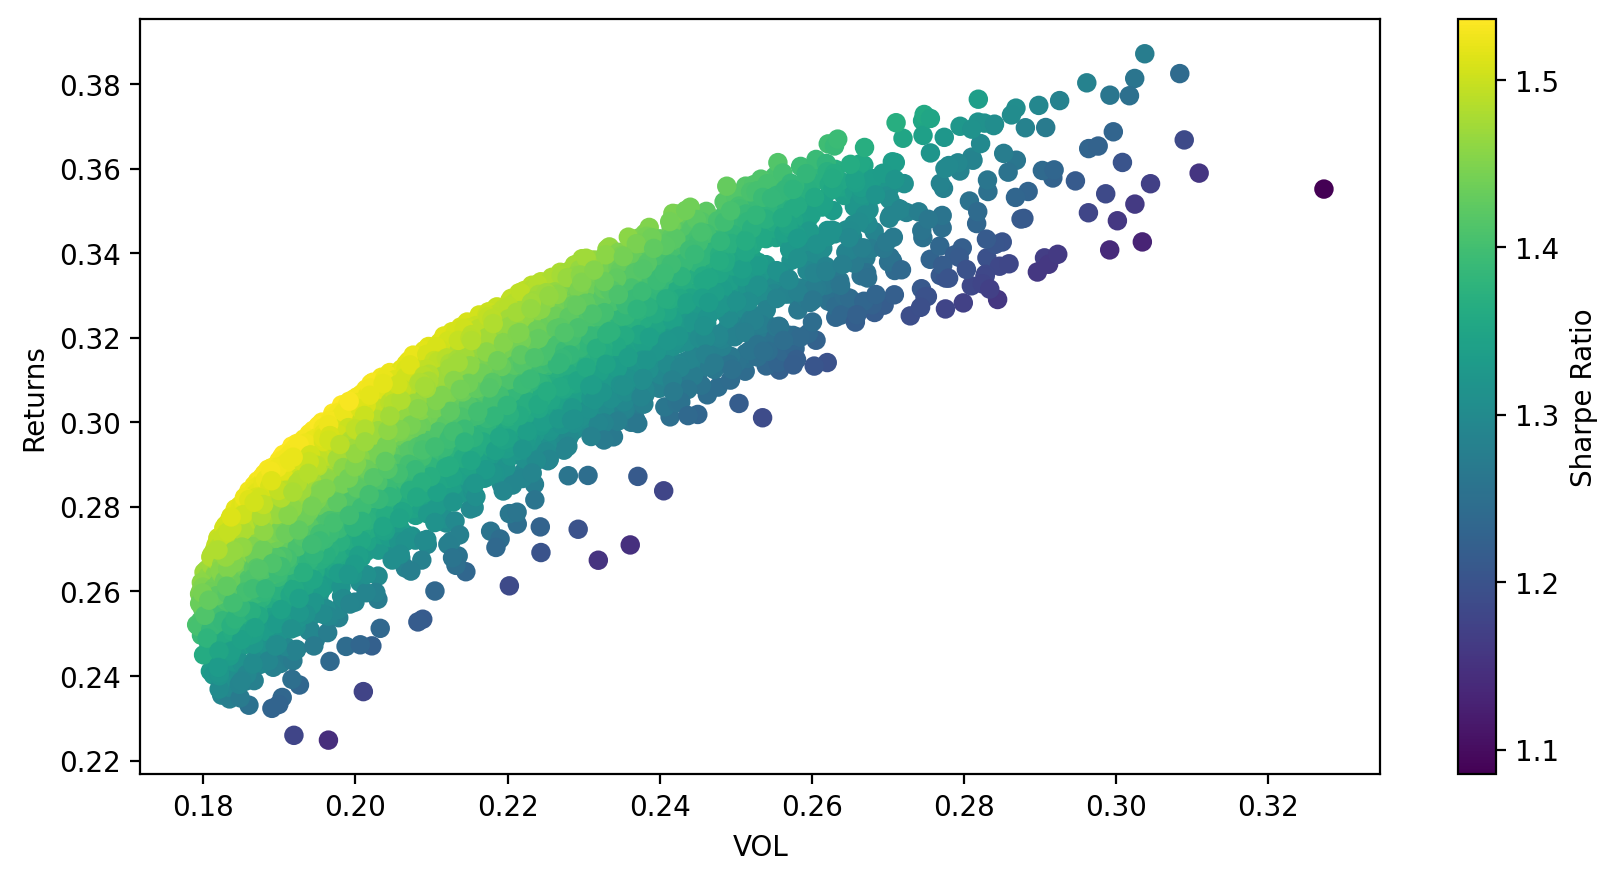

In [66]:
plt.figure(dpi=200, figsize=(10,5))
plt.scatter(Mont_Port_Vol,Monte_portfolio_retrns, c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('VOL')
plt.ylabel('Returns') 

In [67]:
np.argmax(mc_sharpe_ratios)

5131

In [77]:
Mont_weights[5131]

array([0.07108186, 0.22842997, 0.28039844, 0.11339189, 0.30669785])

In [69]:
Retirement_portfolio1

,NFLX,NEE,PGR,TMUS,AMZN
Date,,,,,
2015-01-02,49.848572,22.077126,21.263206,27.299999,15.426000
2015-01-05,47.311428,21.843296,21.027294,26.930000,15.109500
2015-01-06,46.501431,21.928133,20.767794,26.870001,14.764500
2015-01-07,46.742859,22.128860,21.200296,28.250000,14.921000
2015-01-08,47.779999,22.263357,21.624931,29.020000,15.023000
...,...,...,...,...,...
2020-12-24,513.969971,72.713623,91.829361,132.919998,158.634506
2020-12-28,519.119995,73.208206,91.651886,133.000000,164.197998
2020-12-29,530.869995,73.053040,91.250237,133.139999,166.100006


In [70]:
from scipy.optimize import minimize

In [71]:
def function_to_minimize(weights):
    
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [72]:
bounds = tuple((0,1) for n in range (N))

In [73]:
sum_constraint =({'type':'eq','fun': lambda weights: np.sum(weights)-1})

In [74]:
equal_weights = [.20,.20,.20,.20,.20]

In [75]:
minimize(fun=function_to_minimize,
         x0=equal_weights,
         bounds=bounds,
         constraints=sum_constraint)

     fun: -1.598137983363948
     jac: array([1.59794365, 1.59798335, 1.59790775, 1.5987523 , 1.59849517])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.01762174, 0.39186214, 0.3135265 , 0.14489465, 0.13209497])

<AxesSubplot:xlabel='Date'>

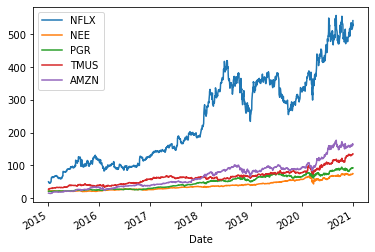

In [76]:
Retirement_portfolio1.plot()